0 1 600
998 1998 -999 -1999 1.0 1.0 0 1 600


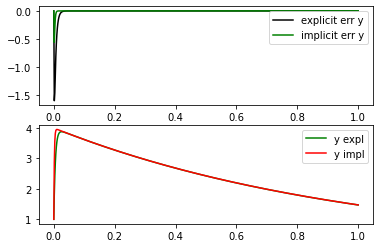

In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

n = 600
t1 = 0
t2 = 1
alpha = 0.75

a = 998
b = 1998
c = -999
d = -1999
"""

a = -1
b = 0
c = 0
d = -2
"""

f10 = 1.
f20 = 1.

def f1(x, y, t):
    return a*x + b*y
def f2(x, y, t):
    return c*x + d*y

def xe(t):
    return 4*np.exp(-t) - 3*np.exp(-1000*t)
def ye(t):
    return 3*np.exp(-1000*t) - 2*np.exp(-t)


def MethodKramer(a, b, c, d, h, f1, f2):
    delta = (h*a-1)*(h*d - 1) - h*b*h*c
    delta1 = -f1*(h*d - 1) + f2*h*b
    delta2 = (h*a - 1)*(-f2) + h*c*f1
    
    return [delta1/delta, delta2/delta]

def MethodEuler(a, b, c, d, f10, f20, t1, t2, n):
    x = [f10]
    y = [f20]
    print (t1, t2, n)
    t = np.linspace(t1, t2, n+1)
    h = t[1] - t[0]
    
    for i in range(0, n):
        [xi, yi] = MethodKramer(a, b, c, d, h, x[i], y[i])
        
        x.append(xi)
        y.append(yi)
        
    return [t, x, y]


def MethodRunge(f1, f2, f10, f20, t1, t2, n, alpha):
    y = [f20]
    x = [f10]
    t = np.linspace(t1, t2, n+1)
    h = t[1] - t[0]
    for i in range(0, n):
        y.append(y[i] + h*((1-alpha)*f2(*[x[i], y[i], t[i]]) + 
                 alpha*f2(*[(x[i] + h*0.5/alpha*f1(*[x[i], y[i], t[i]])),
                            (y[i] + h*0.5/alpha*f2(*[x[i], y[i], t[i]])), 
                            (t[i]+h*0.5/alpha)])))
        x.append(x[i] + h*((1-alpha)*f1(*[x[i], y[i], t[i]]) + 
                     alpha*f1(*[(x[i] + h*0.5/alpha*f1(*[x[i], y[i], t[i]])),
                                (y[i] + h*0.5/alpha*f2(*[x[i], y[i], t[i]])), 
                                (t[i]+h*0.5/alpha)])))
    return [t, x, y]

[t0, x1, y1] = MethodRunge(f1, f2, f10, f20, t1, t2, n, alpha)

[t3, x2, y2] = MethodEuler(a, b, c, d, f10, f20, t1, t2, n)

print(a, b, c, d, f10, f20, t1, t2, n)

plt.subplot(211)
#plt.plot(t0, x1 - xe(t1), 'b-', label = 'explicit err x')
#plt.xlim(0.1, 1)
plt.plot(t0, x1 - xe(t0), 'k-', label = 'explicit err y')
#plt.plot(t2, x2 - xe(t2), 'r-', label = 'implicit err x')
plt.plot(t3, x2 - xe(t3), 'g-', label = 'implicit err y')
plt.legend()
plt.subplot(212)
#plt.plot(t0, x1, 'k-', label = 'x expl')
plt.plot(t0, x1, 'g-', label = 'y expl')
#plt.plot(t2, x2, 'b-', label = 'x impl')
plt.plot(t3, x2, 'r-', label = 'y impl')
plt.legend()
plt.show()


